In [3]:
import pandas
import numpy
import matplotlib as mpl
import pathlib
import yaml
import numpy
import matplotlib.pyplot as plt

In [4]:
with open(f'../etc/SSM_config_KingCounty.yaml', 'r') as file:
    ssm = yaml.safe_load(file)

In [5]:
out_dir=pathlib.Path(
    '/mmfs1/gscratch/ssmc/USRS/PSI/Rachael/projects/KingCounty/data/KingCounty'
)
wc_file = "KingCounty_wc_noncompliant_m0p25.xlsx"

In [6]:
ncdf=pandas.read_excel(out_dir/wc_file)

In [7]:
ncdf

,Unnamed: 0,85% West Point\n(South & Brightwater 3 mg/l),"85% West Point, South,\nand Brightwater",50% West Point,No West Point,50% South,No South,50% Brightwater,No Brightwater,50% Green R.,200% Green R.,2014 Conditions
0,Hood,116,134,127,114,133,122,142,135,137,170,146
1,Main,230,245,242,232,242,231,245,245,245,251,246
2,SJF_Admiralty,0,0,0,0,0,0,0,0,0,0,0
3,SOG_Bellingham,48,50,49,48,50,49,50,50,50,52,52
4,South_Sound,325,328,327,327,327,326,331,329,331,331,331
5,Whidbey,159,178,171,152,176,163,184,179,183,197,191
6,ALL_REGIONS,329,333,332,331,332,330,335,334,335,336,335


In [8]:
[*ncdf]

['Unnamed: 0',
 '85% West Point\n(South & Brightwater 3 mg/l)',
 '85% West Point, South,\nand Brightwater ',
 '50% West Point',
 'No West Point',
 '50% South',
 'No South',
 '50% Brightwater',
 'No Brightwater',
 '50% Green R.',
 '200% Green R.',
 '2014 Conditions']

In [9]:
ncdf=ncdf.set_index('Unnamed: 0')

In [10]:
[*ssm['line']['color']] 

['4c',
 '4d',
 '4e',
 '4f',
 '4g',
 '4h',
 '4i',
 '4j',
 '4k',
 '4l',
 'deviation',
 'wqm_baseline',
 'wqm_reference']

In [11]:
runs = [index for index in [*ssm['line']['color']] if index[0] == '4']
runs.append('wqm_baseline')
runs

['4c', '4d', '4e', '4f', '4g', '4h', '4i', '4j', '4k', '4l', 'wqm_baseline']

In [12]:
colors = [ssm['line']['color'][run] for run in runs]
colors


['darkslategrey',
 'cyan',
 'steelblue',
 'sienna',
 'teal',
 'royalblue',
 'brown',
 'olive',
 'orchid',
 'midnightblue',
 'darkviolet']

In [13]:
colors = [
'darkslategrey',
 'grey',
 'teal',
 'c',
 'darkgoldenrod',
 'goldenrod',
 'indigo',
 'thistle',
 'darkgreen',
 'olive',
 'darkred']

In [14]:
scale = 1.5
mpl.rc('font', size=11*scale)
# some of the following may be repetetive but can also be set relative to the font value above 
#    (eg "xx-small, x-small,small, medium, large, x-large, xx-large, larger, or smaller"; see link above for details)
mpl.rc('xtick', labelsize=12*scale)
mpl.rc('ytick', labelsize=12*scale)
mpl.rc('legend', fontsize=12*scale)
mpl.rc('axes', titlesize=16*scale)
mpl.rc('axes', labelsize=12*scale)
mpl.rc('figure', titlesize=16*scale)
mpl.rc('text', usetex=False)
mpl.rc('font', family='sans-serif', weight='normal', style='normal')

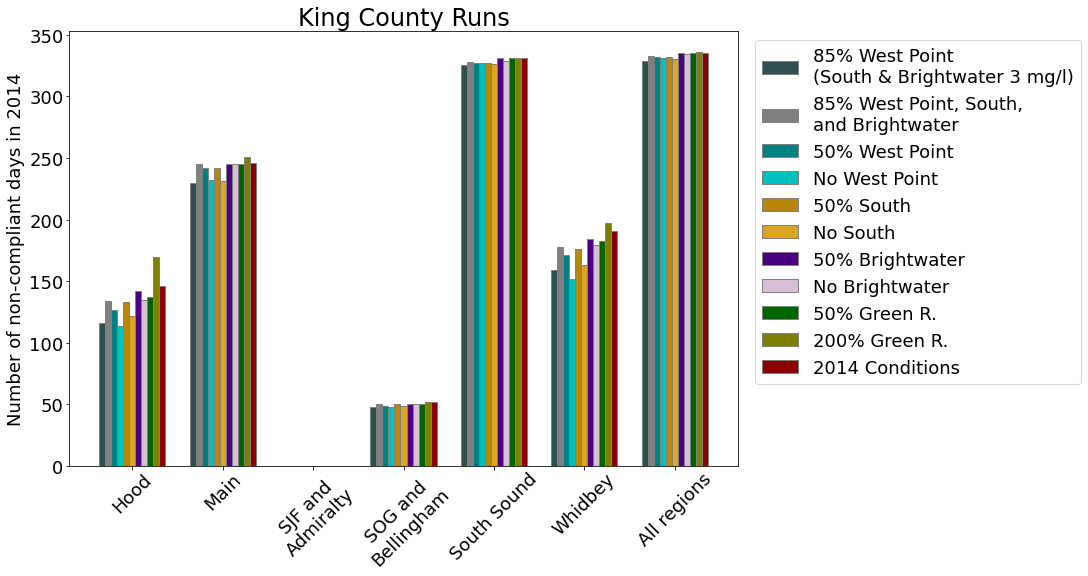

In [15]:
# set width of bar
barWidth = 1
spaceBetween=15
fig,ax = plt.subplots(figsize =(12, 8))
 
# set height of bar
barHeight={}
barX = {}
for idx,run in enumerate([*ncdf]):
    barHeight[run]=ncdf[run]
    if idx==0:
        barX[run]=numpy.arange(0,spaceBetween*len(ncdf[run]),spaceBetween)
    else:
        barX[run]=[x + barWidth for x in barX[[*ncdf][idx-1]]]
    if idx in [3,5,7]: 
        plt.bar(
            barX[run], 
            barHeight[run],  
            width=barWidth,
            color=colors[idx],
            #hatch='.',
            label=[*ncdf][idx],
            edgecolor='grey'
            
        )
    else:       
        plt.bar(
            barX[run], 
            barHeight[run],  
            width=barWidth,
            color=colors[idx],
            label=[*ncdf][idx],
             edgecolor='grey'

        )
ax.set_xticks(numpy.arange(0+spaceBetween/3,spaceBetween*len(ncdf[run]),spaceBetween))
ax.set_xticklabels(
        ["Hood","Main","SJF and\nAdmiralty","SOG and\nBellingham","South Sound", "Whidbey", "All regions"],
        rotation=45
    )
ax.legend(bbox_to_anchor=(1.525, 1), loc='upper right')
ax.set_ylabel("Number of non-compliant days in 2014")
ax.set_title('King County Runs')
plt.savefig(pathlib.Path(ssm['paths']['graphics'])/f'KingCounty_NonCompliantDays.png',dpi=350)
plt.show()

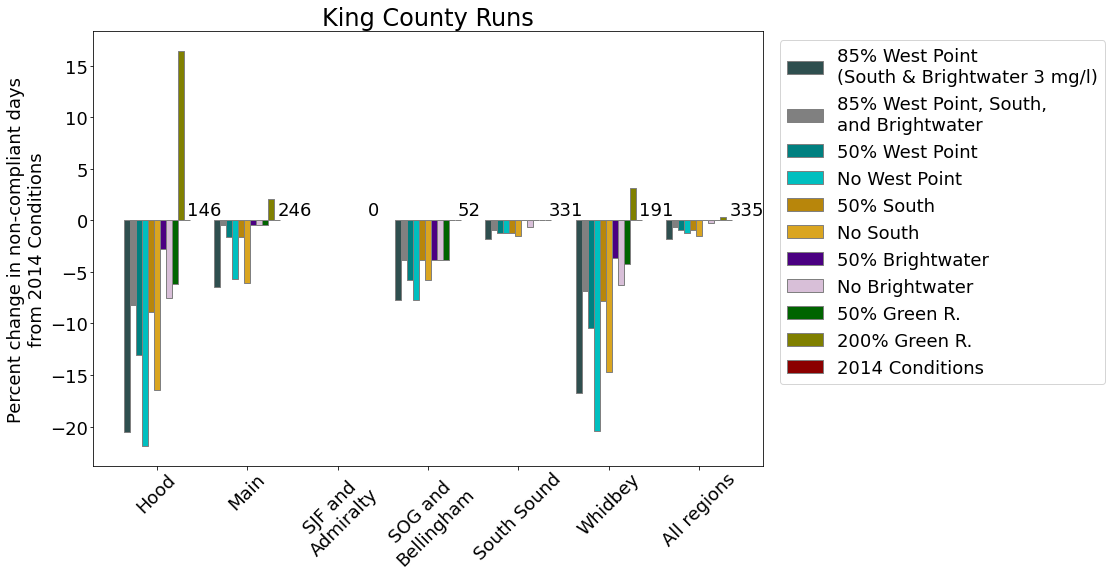

In [38]:
# create list of non-compliance days
nc_days = [str(ncd) for ncd in ncdf['2014 Conditions'][:].to_list()]

# set width of bar
barWidth = 1
spaceBetween=15
fig,ax = plt.subplots(figsize =(12, 8))
 
# set height of bar
barHeight={}
barX = {}
for idx,run in enumerate([*ncdf]):
    barHeight[run]=ncdf[run]
    if idx==0:
        barX[run]=numpy.arange(0,spaceBetween*len(ncdf[run]),spaceBetween)
    else:
        barX[run]=[x + barWidth for x in barX[[*ncdf][idx-1]]]
    plt.bar(
        barX[run], 
        100*((barHeight[run]-ncdf['2014 Conditions'])/ncdf['2014 Conditions']),  
        width=barWidth,
        color=colors[idx],
        label=[*ncdf][idx],
         edgecolor='grey'

    )
for idx in numpy.arange(len(barX['2014 Conditions'])):
    plt.text(
       numpy.array(barX['2014 Conditions'][idx]),
       0.5,
       nc_days[idx],
       fontsize=12*scale
    )

    
ax.set_xticks(numpy.arange(0+spaceBetween/3,spaceBetween*len(ncdf[run]),spaceBetween))
ax.set_xticklabels(
        ["Hood","Main","SJF and\nAdmiralty","SOG and\nBellingham","South Sound", "Whidbey", "All regions"],
        rotation=45
    )
ax.legend(bbox_to_anchor=(1.525, 1), loc='upper right')
ax.set_ylabel("Percent change in non-compliant days\nfrom 2014 Conditions")
ax.set_title('King County Runs')
plt.savefig(pathlib.Path(ssm['paths']['graphics'])/f'KingCounty_NonCompliantDays_percentChange.png',dpi=350)

plt.show()

In [31]:
barX['2014 Conditions']

[10, 25, 40, 55, 70, 85, 100]

In [32]:
numpy.zeros(len(barX['2014 Conditions']))+0.5

array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5])

In [20]:
numpy.zeros(len(barX['2014 Conditions']))

array([0., 0., 0., 0., 0., 0., 0.])

In [27]:
nc_days = [str(ncd) for ncd in ncdf['2014 Conditions'][:].to_list()]
days

['146', '246', '0', '52', '331', '191', '335']

In [17]:
ssm['paths']['graphics']

'/mmfs1/gscratch/ssmc/USRS/PSI/Rachael/projects/KingCounty/graphics/'